In [3]:
from mp1 import * 
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D , MaxPooling2D, Flatten,Dropout

from keras.utils import np_utils
from keras.optimizers import SGD
from keras.optimizers import Adam

from keras.callbacks import History


Using TensorFlow backend.


### Simple classification 

Generate dataset of three classes : 0= rectangle , 1 = disk and 2 = triangle 

In [4]:
#### Simple classification ####

[X_train, Y_train] = generate_dataset_classification(300, 20)

#reformatting the desired output
Y_train = np_utils.to_categorical(Y_train,3)

#Linear_classifier

linClassifier = Sequential([Dense(3),
                           Activation('softmax')])


Creating data:


In [15]:
#Using SGD 
sgd = SGD(lr=0.001,momentum = 0.9, decay = 1e-6, nesterov=True)

# we will use as usual in multi-class classification used categorical_crossentropy loss

linClassifier.compile(sgd,loss='categorical_crossentropy',metrics=['accuracy'])

linClassifier.fit(X_train,Y_train, epochs=10 , batch_size=32)


Epoch 1/10
300/300 [==============================] - 2s 7ms/step - loss: 1.0814 - acc: 0.5133
Epoch 2/10
300/300 [==============================] - 0s 148us/step - loss: 0.8942 - acc: 0.6567
Epoch 3/10
300/300 [==============================] - 0s 150us/step - loss: 0.5323 - acc: 0.7533
Epoch 4/10
300/300 [==============================] - 0s 146us/step - loss: 0.3721 - acc: 0.8700
Epoch 5/10
300/300 [==============================] - 0s 147us/step - loss: 0.3115 - acc: 0.9500
Epoch 6/10
300/300 [==============================] - 0s 163us/step - loss: 0.3069 - acc: 0.8733
Epoch 7/10
300/300 [==============================] - 0s 155us/step - loss: 0.2515 - acc: 0.9233
Epoch 8/10
300/300 [==============================] - 0s 164us/step - loss: 0.2317 - acc: 0.9500
Epoch 9/10
300/300 [==============================] - 0s 162us/step - loss: 0.2111 - acc: 0.9633
Epoch 10/10
300/300 [==============================] - 0s 167us/step - loss: 0.1998 - acc: 0.9733


In [16]:
#Using adam optimizer

linClassifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
linClassifier.fit(X_train,Y_train, epochs=10 , batch_size=32)



Epoch 1/10
300/300 [==============================] - 0s 624us/step - loss: 0.7520 - acc: 0.7700
Epoch 2/10
300/300 [==============================] - 0s 167us/step - loss: 0.3941 - acc: 0.8133
Epoch 3/10
300/300 [==============================] - 0s 176us/step - loss: 0.2418 - acc: 0.9000
Epoch 4/10
300/300 [==============================] - 0s 167us/step - loss: 0.1871 - acc: 0.9333
Epoch 5/10
300/300 [==============================] - 0s 161us/step - loss: 0.1259 - acc: 0.9833
Epoch 6/10
300/300 [==============================] - 0s 163us/step - loss: 0.1227 - acc: 0.9800
Epoch 7/10
300/300 [==============================] - 0s 156us/step - loss: 0.1135 - acc: 0.9900
Epoch 8/10
300/300 [==============================] - 0s 173us/step - loss: 0.0953 - acc: 0.9900
Epoch 9/10
300/300 [==============================] - 0s 161us/step - loss: 0.1028 - acc: 0.9867
Epoch 10/10
300/300 [==============================] - 0s 199us/step - loss: 0.0847 - acc: 1.0000


#### when using adam the loss decreases faster !!


### Test 

We will check our classifier on a single disk sample, we see that the output is [0,1,0] which corresponds to the second class of our data : disk 

In [17]:
#Test

X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])   #single prediction reshape to (1,dim_in)
linClassifier.predict(X_test)


array([[0., 1., 0.]], dtype=float32)

### Visualization of the Solution

In [0]:
#Visualization of the weights of the linear classifier

weights = linClassifier.get_weights()


Text(0.5,1,'visualization of the column of weights of the rectangle')

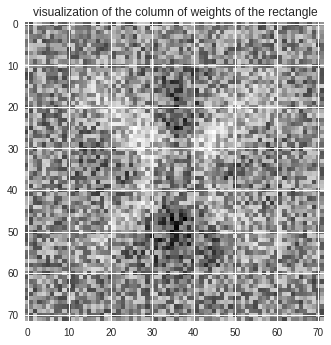

In [25]:
#visualizing each layer as an image 
#rectangle
im = weights[0][:,0]
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE))
plt.title("visualization of the column of weights of the rectangle")

Text(0.5,1,'visualization of the column of weights of the disk')

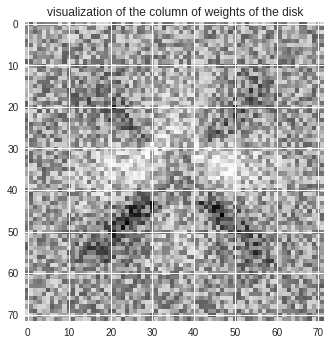

In [26]:
#circle
im = weights[0][:,1]
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE))
plt.title("visualization of the column of weights of the disk")

Text(0.5,1,'visualization of the column of weights of the triangle')

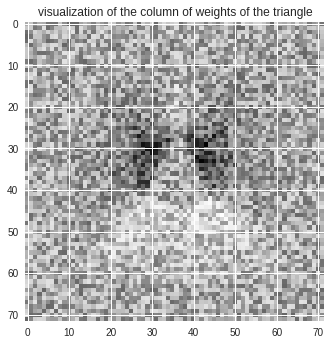

In [27]:
#triangle
im = weights[0][:,2]
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE))
plt.title("visualization of the column of weights of the triangle")

### A More Difficult Classification Problem

$ - Train$

In [28]:
#A More Difficult Classification Problem

[X_train, Y_train] = generate_dataset_classification(1000, 20, True)
Y_train = np_utils.to_categorical(Y_train,3)

#retrain the classifier
linClassifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

linClassifier.fit(X_train,Y_train, epochs=200 , batch_size=32)


Creating data:
Epoch 1/200
1000/1000 [==============================] - 0s 306us/step - loss: 2.6023 - acc: 0.3540
Epoch 2/200
1000/1000 [==============================] - 0s 165us/step - loss: 1.5431 - acc: 0.4140
Epoch 3/200
1000/1000 [==============================] - 0s 158us/step - loss: 1.3218 - acc: 0.4620
Epoch 4/200
1000/1000 [==============================] - 0s 156us/step - loss: 1.0601 - acc: 0.5230
Epoch 5/200
1000/1000 [==============================] - 0s 159us/step - loss: 1.0612 - acc: 0.5390
Epoch 6/200
1000/1000 [==============================] - 0s 158us/step - loss: 1.0161 - acc: 0.5320
Epoch 7/200
1000/1000 [==============================] - 0s 165us/step - loss: 0.9715 - acc: 0.5470
Epoch 8/200
1000/1000 [==============================] - 0s 159us/step - loss: 0.9157 - acc: 0.5600
Epoch 9/200
1000/1000 [==============================] - 0s 156us/step - loss: 0.9634 - acc: 0.5630
Epoch 10/200
1000/1000 [==============================] - 0s 155us/step - loss: 0.870

 $ - Evaluate$ on the test set  

In [29]:
[X_test, Y_test] = generate_test_set_classification()

#evaluate 
#return the loss value and the metrics 
linClassifier.evaluate(X_test, Y_test)


Creating data:
300/300 [==============================] - 0s 207us/step


[0.7940646962324778, 0.6466666658719381]

Results on the test set : - loss = 0.794 and - accuracy = 0.646

### Convolutional Net 

We will use a simple architecture with only one convolutional layer with 16 5x5 filters along with relu activation and a maxpooling layer and we'll use dropout, and finally a fully connected layer with a softmax activation to predict the classes. 

In [30]:
###########" Convolutional Net ################

model = Sequential([Conv2D(16,(5,5),activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE,1)),
                    MaxPooling2D((2,2)),
                    Dropout(0.25),
                    Flatten(),
                    Dense(3,activation='softmax')])

#Reshape in order to be compatible with conv2d expected input (nb_examples,width,height,channels)
X_train = X_train.reshape(X_train.shape[0],IMAGE_SIZE,IMAGE_SIZE,1)  

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train, epochs = 50 , batch_size=32)


Epoch 1/50
1000/1000 [==============================] - 2s 2ms/step - loss: 1.0493 - acc: 0.4560
Epoch 2/50
1000/1000 [==============================] - 0s 306us/step - loss: 0.8095 - acc: 0.6390
Epoch 3/50
1000/1000 [==============================] - 0s 307us/step - loss: 0.7230 - acc: 0.6960
Epoch 4/50
1000/1000 [==============================] - 0s 307us/step - loss: 0.6549 - acc: 0.7240
Epoch 5/50
1000/1000 [==============================] - 0s 303us/step - loss: 0.6031 - acc: 0.7690
Epoch 6/50
1000/1000 [==============================] - 0s 309us/step - loss: 0.5664 - acc: 0.7840
Epoch 7/50
1000/1000 [==============================] - 0s 312us/step - loss: 0.5250 - acc: 0.8090
Epoch 8/50
1000/1000 [==============================] - 0s 307us/step - loss: 0.4890 - acc: 0.8090
Epoch 9/50
1000/1000 [==============================] - 0s 308us/step - loss: 0.4585 - acc: 0.8340
Epoch 10/50
1000/1000 [==============================] - 0s 306us/step - loss: 0.4345 - acc: 0.8500
Epoch 11/50

### Evaluating the CNN on the test set 

In [31]:
model.evaluate(X_test.reshape(X_test.shape[0],IMAGE_SIZE,IMAGE_SIZE,1), Y_test)


300/300 [==============================] - 0s 390us/step


[0.44203633546829224, 0.8399999992052714]

 We notice that the loss and accuracy both increased comparing to the previous classification model on the same dataset. The convolutional network performs better on the previous classification task when the images start to have change position in the images, this can be interpreted by the fact that the convolutional filters are translation invariant and capture the same features in different positions in the image un like the fully connected layer architecture.

## A Regression Problem

Before we proceed to the model we should sort the vertices labels in a logical order 

In [5]:
###########" Regression Problem ################
history = History()
optimizer = Adam(lr = .0001)


[X_train, Y_train] = generate_dataset_regression(5000, 20) 
[X_val, Y_val] = generate_test_set_regression()


def sorted_vertices(vertices):
    
   arr = sorted(zip(vertices[[2*i for i in range(3)]],vertices[[2*i+1 for i in range(3)]]))
   
   return list(np.array(arr).flatten())


reg2 = Sequential([Conv2D(64,(3,3),activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE,1)),
                   Conv2D(128,(5,5), activation ='relu'),
                    MaxPooling2D(strides = 2),
                    Dropout(0.25),
                    Flatten(),
                    Dense(32,activation='sigmoid'),
                    Dense(6)])

reg2.compile(optimizer=optimizer,loss='mean_squared_error',metrics=['accuracy'])

print(reg2.summary())



Creating data:
Creating data:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 70, 70, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 66, 66, 128)       204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 33, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 33, 33, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 139392)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4460576   
_________________________________________________________________
dense_3 (Dense)              (None, 6)        

Train on 5000 samples, validate on 300 samples
Epoch 1/30
5000/5000 [==============================] - 14s 3ms/step - loss: 0.1104 - acc: 0.2530 - val_loss: 0.0504 - val_acc: 0.4967
Epoch 2/30
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0395 - acc: 0.5540 - val_loss: 0.0334 - val_acc: 0.5667
Epoch 3/30
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0305 - acc: 0.5840 - val_loss: 0.0282 - val_acc: 0.6133
Epoch 4/30
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0259 - acc: 0.6208 - val_loss: 0.0248 - val_acc: 0.6267
Epoch 5/30
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0220 - acc: 0.6532 - val_loss: 0.0218 - val_acc: 0.6467
Epoch 6/30
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0190 - acc: 0.6864 - val_loss: 0.0204 - val_acc: 0.6600
Epoch 7/30
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0170 - acc: 0.6946 - val_loss: 0.0184 - val_acc: 0.7300
Epoch 8/30
500

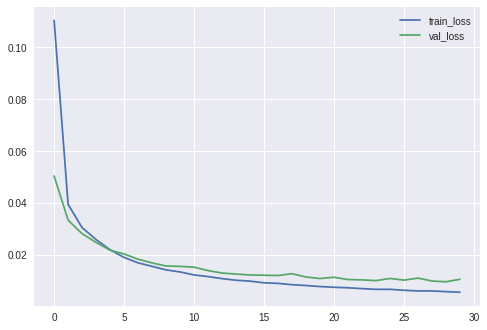

In [6]:
X_train = X_train.reshape(X_train.shape[0],IMAGE_SIZE,IMAGE_SIZE,1) 
Y_train = np.array([sorted_vertices(Y_train[i]) for i in range(len(Y_train))])

X_val = X_val.reshape(X_val.shape[0],IMAGE_SIZE,IMAGE_SIZE,1) 
Y_val = np.array([sorted_vertices(Y_val[i]) for i in range(len(Y_val))])



reg2.fit(X_train,Y_train ,validation_data = [X_val, Y_val], epochs = 30,batch_size=64, callbacks = [history])

plt.plot(history.history['loss'] , label = 'train_loss')
plt.plot(history.history['val_loss'] , label= 'val_loss')
plt.legend()
plt.show() 

In [7]:
# evaluation of the regression 

[X_test, Y_test] = generate_test_set_regression()
X_test = X_test.reshape(X_test.shape[0],IMAGE_SIZE,IMAGE_SIZE,1) 

reg2.evaluate(X_test, Y_test)

Y_pred = reg2.predict(X_test)



Creating data:
300/300 [==============================] - 1s 2ms/step


#### Prediction visualization on a sample of the test set 

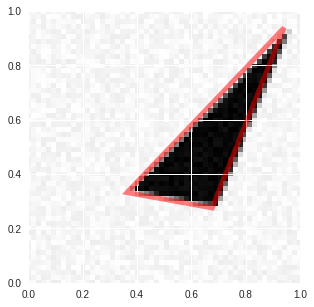

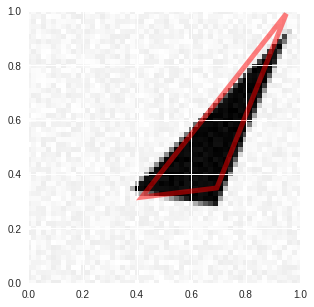

In [8]:
visualize_prediction(X_test[0], Y_test[0])

visualize_prediction(X_test[0], Y_pred[0])

## Image Denoising

 #### Data set generation for the denoising classification 

In [0]:
def generate_noisy_dataset(nb_examples,noise=20.0, free_location=False):
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_examples,im_size])
    X_noisy = np.zeros([nb_examples,im_size])
    
    for i in range(nb_examples):
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        
        #add noise to create a noisy sample with the same content
        X_noisy[i] = X[i] + np.random.normal(size = im_size)*30
        

    X_noisy = (X_noisy + noise) / (255 + 2*noise + 30)
    X = (X + noise) / (255 + 2*noise)
    
    return X_noisy, X


In [0]:
X_noisy , X = generate_noisy_dataset(500, noise=10, free_location=False)
X_noisy_test , X_test = generate_noisy_dataset(300, noise=10, free_location=False)

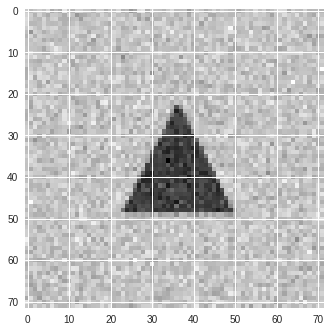

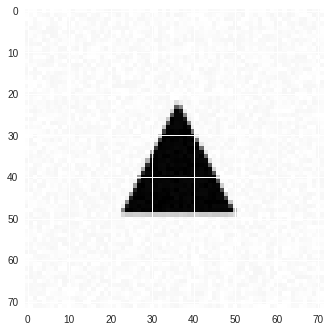

In [53]:
im = X_noise[0]
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()

im = X[0]
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()

#### Building an hourglass network for denoising 

Train on 500 samples, validate on 300 samples
Epoch 1/70
500/500 [==============================] - 1s 3ms/step - loss: 0.1985 - val_loss: 0.1852
Epoch 2/70
500/500 [==============================] - 0s 697us/step - loss: 0.1756 - val_loss: 0.1608
Epoch 3/70
500/500 [==============================] - 0s 690us/step - loss: 0.1517 - val_loss: 0.1369
Epoch 4/70
500/500 [==============================] - 0s 706us/step - loss: 0.1293 - val_loss: 0.1160
Epoch 5/70
500/500 [==============================] - 0s 712us/step - loss: 0.1111 - val_loss: 0.1004
Epoch 6/70
500/500 [==============================] - 0s 702us/step - loss: 0.0985 - val_loss: 0.0908
Epoch 7/70
500/500 [==============================] - 0s 710us/step - loss: 0.0912 - val_loss: 0.0853
Epoch 8/70
500/500 [==============================] - 0s 717us/step - loss: 0.0864 - val_loss: 0.0809
Epoch 9/70
500/500 [==============================] - 0s 699us/step - loss: 0.0817 - val_loss: 0.0762
Epoch 10/70
500/500 [=================

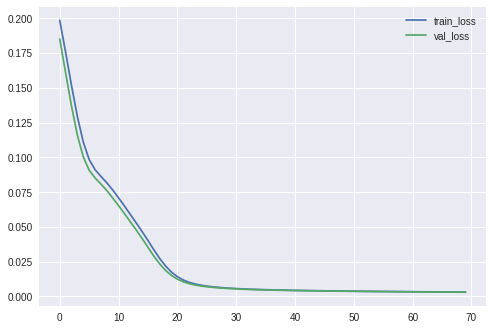

In [14]:

from keras.layers import UpSampling2D

lr = 0.0001
epochs = 100
batch_size = 64
history = History()

X_noisy =X_noisy.reshape((X_noisy.shape[0] , IMAGE_SIZE , IMAGE_SIZE , 1))
X_noisy_test =X_noisy_test.reshape((X_noisy_test.shape[0] , IMAGE_SIZE , IMAGE_SIZE , 1))

X =X.reshape((X.shape[0] , IMAGE_SIZE , IMAGE_SIZE , 1))
X_test =X_test.reshape((X_test.shape[0] , IMAGE_SIZE , IMAGE_SIZE , 1))


model = Sequential()
model.add(Conv2D(16 , 3 , input_shape = (72 , 72 , 1) , data_format="channels_last" , padding = 'same' ))
model.add(MaxPooling2D(strides = (2,2)))
model.add(Activation('relu'))

model.add(Conv2D(32 , 3 , data_format="channels_last" , padding = 'same' ))
model.add(MaxPooling2D(strides = (2,2)))
model.add(Activation('relu'))



model.add(UpSampling2D(size = (2,2)))
model.add(Conv2D(32 , 3 , data_format="channels_last" ,padding = 'same' ))
model.add(Activation('relu'))

model.add(UpSampling2D(size = (2,2)))
model.add(Conv2D(1 , 5  , data_format="channels_last" , padding = 'same'))
model.add(Activation('sigmoid'))

optimizer = Adam(lr = 0.0001)
model.compile(loss='mean_squared_error', optimizer= optimizer)

model.fit(X_noisy, X, validation_data = [X_noisy_test, X_test] ,epochs= 70, batch_size=64, callbacks = [history])

plt.plot(history.history['loss'] , label = 'train_loss')
plt.plot(history.history['val_loss'] , label= 'val_loss')
plt.legend()
plt.show()

Check the test on a sample of the test set 

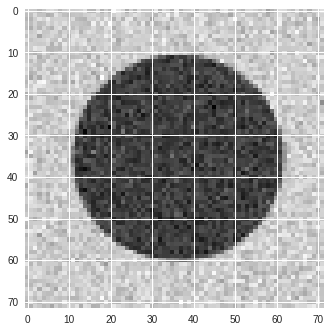

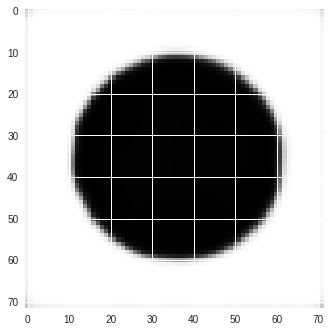

In [17]:

im = X_noisy[0]
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()

im = model.predict(X_noisy[:1])
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()